# Read & Clear Data

In [40]:
import numpy as np
import pandas as pd
import feather 
import matplotlib.pyplot as plt  
from time import time
from mailerWithUtf8 import mail
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import os

In [41]:
def save_dataframe(df, out_filename):
   # write to csv and no index
    t0 = time()
    df.to_csv(out_filename + ".csv", index=False, encoding='utf-8')
#     df.to_csv(out_filename + ".csv", encoding='utf-8')
    print("time for output csv file: %.2f" % (time()-t0))

In [42]:
start_time = time()
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
# filename = '0713_april_marketing_anylze_full_table_group12_select_max_min.feather' 
filename = "0719_april_marketing_anylze_full_table_group11_max_min.csv"
# train_df = feather.read_dataframe(path + filename)
train_df = pd.read_csv(path + filename, error_bad_lines=False)

print('load feather %s seconds', format(time() - start_time))

load feather %s seconds 0.6803898811340332


In [43]:
# filename = '0713_april_marketing_anylze_full_table_group12_max_min_test.feather' 
# filename = '0713_april_marketing_anylze_full_table_group12_select_max_min_test.feather' 
# filename = '0713_april_marketing_anylze_full_table_group12_max_min.feather' 

# test_df = feather.read_dataframe(path + filename)
filename = "0719_april_marketing_anylze_full_table_group11_max_min_test.csv"
test_df = pd.read_csv(path + filename, error_bad_lines=False)

print('load feather %s seconds', format(time() - start_time))

load feather %s seconds 0.8162863254547119


In [44]:
wants_col = ['SRV_TYPE_DESC',
 'GENDER_CODE',
 'AGE',
 'TENURE_SCV',
 'BILL_CITY_NAME',
 'DORMANT_MONTH_CNT_MKT',
 'IMEI_MFG_NAME',
 'IMEI_BAND',
 'CHURN_CLM_IND',
 'PTY_NP_IN_IND',
 'PTY_NP_OUT_IND',
 'MDS_CURR_RENEW_CNT',
 'PROM_CURR_EXP_MONTH_CNT',
 'CURR_PROM_COMMIT_MONTHS',
 'NET_INV_AMT',
 'AGENCY_AMT',
 'MT_STM_AMT',
 'VOICE_RC_AMT',
 'DATA_RC_AMT',
 'ONNET_AMT',
 'OFFNETM_AMT',
 'PSTN_AMT',
 'INT_ROAM_AMT',
 'IDD_AMT',
 'DATA_INV_AMT',
 'VOICE_INV_AMT',
 'GOOGLE_PLAY_IND',
 'MO_TTL_DURATION',
 'MO_ONNET_DUR',
 'MO_OFFNET_DUR',
 'PSTN_DUR',
 'MO_TTL_COUNT',
 'MO_ONNET_CNT',
 'MO_OFFNET_CNT',
 'PSTN_CNT',
 'MT_TTL_DURATION',
 'MT_ONNET_DUR',
 'MT_OFFNET_DUR',
 'MT_PSTN_DUR',
 'MT_TTL_COUNT',
 'MT_ONNET_CNT',
 'MT_OFFNET_CNT',
 'MT_PSTN_CNT',
 'MOST_MO_OPERATOR',
 'MOST_MT_OPERATOR',
 'MOC_FET_DUR',
 'MOC_TWM_DUR',
 'MOC_CHM_DUR',
 'MOC_OTH_DUR',
 'MOC_PSTN_DUR',
 'MOST_MO_DUR',
 'MTC_FET_DUR',
 'MTC_TWM_DUR',
 'MTC_CHM_DUR',
 'MTC_PSTN_DUR',
 'MOST_MT_DUR',
 'CUST_TYPE',
 'FLAT_RATE_4G_IND',
 'FLAT_RATE_3G_IND',
 'VOICE_MONTHLY_FEE',
 'DATA_MONTHLY_FEE',
 'DATA_RATING_USAGE_MB',
 'HS_CHG_CNT',
 'AVG_HS_USE_MONTH',
 'Groups']


In [45]:
train_df = train_df[wants_col]
test_df = test_df[wants_col]

In [46]:
CLASSIFIER = "RANDOM_FOREST"
CURRENT_MODE = "SELECT_MODE"


In [47]:
groups = train_df["Groups"].unique()

In [48]:
out_filename = CLASSIFIER + "_" + CURRENT_MODE + '_'

In [49]:
out_path = "clf_random_forest_model_kFold/all/" 
if not os.path.exists(out_path):
    os.makedirs(out_path)

In [50]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [51]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

# convert y to numeric# 

In [52]:
le = preprocessing.LabelEncoder()
le.fit(train_df["Groups"].unique())
train_numeric_y = le.transform(train_y)


In [53]:
test_numeric_y = le.transform(test_y) 

# build Random Forest Classifier


In [54]:
start_time = time()


In [55]:
rf = RandomForestClassifier(max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1,
                            n_estimators = 10)



In [56]:
param_grid = {"criterion" : ["gini"], 
              "min_samples_leaf" : [10], 
              "min_samples_split" : [2],
#               "max_depth" : [10],
              "n_estimators": [100]}

In [57]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_clf = gs.fit(train_x, train_numeric_y)

In [79]:
clf = grid_clf.best_estimator_

# saving classifier

In [58]:
# joblib.dump(clf, out_path + out_filename + 'CLF.pkl') 
# clf = joblib.load('filename.pkl') 


In [80]:
clf_info = str(("Accuracy on training set: %f" % grid_clf.score(train_x, train_numeric_y))) + '\n'
clf_info += str(("Accuracy on test set: %f" % clf.score(test_x, test_numeric_y))) + '\n'
clf_info += str(('fit time %s seconds' % format(time() - start_time))) + '\n'
print(clf_info)

Accuracy on training set: 0.601234
Accuracy on test set: 0.601541
fit time 3855.1424872875214 seconds



In [69]:
from winsound import Beep
Beep(440, 500) 
Beep(440, 500) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000) 
Beep(659, 500) 
Beep(659, 500) 
Beep(659, 500) 
Beep(698, 350) 
Beep(523, 150) 
Beep(415, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000)

In [70]:
from mailerWithUtf8 import mail
test=mail()
test.main("clf_info finished", clf_info)

Start Send Mail
User Email : a - DONE 
User Email : a - DONE 
User Email : 2 - DONE 
User Email : 6 - DONE 
User Email : 3 - DONE 
User Email : 6 - DONE 
User Email : 5 - DONE 
User Email : 5 - DONE 
User Email : 6 - DONE 
User Email : 6 - DONE 
User Email : @ - DONE 
User Email : g - DONE 
User Email : m - DONE 
User Email : a - DONE 
User Email : i - DONE 
User Email : l - DONE 
User Email : . - DONE 
User Email : c - DONE 
User Email : o - DONE 
User Email : m - DONE 
Finish Send Mail


In [81]:
predict_y = clf.predict(test_x)

In [82]:
predict_y 

array([5, 5, 5, ..., 4, 4, 4], dtype=int64)

In [83]:
test_numeric_y

array([ 7,  5, 10, ..., 10,  4,  5], dtype=int64)

# get feature importances

In [84]:
important_dict = dict(zip(train_df.columns[:-1],clf.feature_importances_))

In [85]:
important_dict

{'AGE': 0.023442680914210264,
 'AGENCY_AMT': 0.0066470943467930137,
 'AVG_HS_USE_MONTH': 0.016395947397515466,
 'BILL_CITY_NAME': 0.01609575839595969,
 'CHURN_CLM_IND': 0.0023219234644282689,
 'CURR_PROM_COMMIT_MONTHS': 0.0030025024831141899,
 'CUST_TYPE': 0.00039535743782934449,
 'DATA_INV_AMT': 0.018167474879866759,
 'DATA_MONTHLY_FEE': 0.011675754162344298,
 'DATA_RATING_USAGE_MB': 0.12107019445195824,
 'DATA_RC_AMT': 0.014636838142637694,
 'DORMANT_MONTH_CNT_MKT': 0.0,
 'FLAT_RATE_3G_IND': 0.0005827798053817195,
 'FLAT_RATE_4G_IND': 0.0060627929676443735,
 'GENDER_CODE': 0.0062528869058169831,
 'GOOGLE_PLAY_IND': 0.0028186626464067038,
 'HS_CHG_CNT': 0.0077981120555722806,
 'IDD_AMT': 0.0017826358376382503,
 'IMEI_BAND': 0.0019564289102203727,
 'IMEI_MFG_NAME': 0.056906940778429824,
 'INT_ROAM_AMT': 0.0022897603233691432,
 'MDS_CURR_RENEW_CNT': 0.0075410433942499147,
 'MOC_CHM_DUR': 0.019802819389855932,
 'MOC_FET_DUR': 0.017709228318878313,
 'MOC_OTH_DUR': 0.0090376339651897283,
 

In [91]:
important_list = sorted(important_dict.items(), key=lambda x: x[1])

In [92]:
important_list.reverse()

In [93]:
clf_info += '\n\nFeature Importances\n===================\n'
for row in important_list:
    clf_info += str(row) + "\n"
    print(str(row))

('DATA_RATING_USAGE_MB', 0.12107019445195824)
('IMEI_MFG_NAME', 0.056906940778429824)
('NET_INV_AMT', 0.030570484969101898)
('TENURE_SCV', 0.028437191023796476)
('MT_TTL_DURATION', 0.02666313389000232)
('MT_STM_AMT', 0.025780303135996548)
('AGE', 0.023442680914210264)
('VOICE_INV_AMT', 0.023269603957424861)
('MOST_MT_DUR', 0.02323778072441272)
('MO_TTL_DURATION', 0.022938161295037389)
('MT_OFFNET_DUR', 0.022511569922506258)
('MO_OFFNET_DUR', 0.022034414826085844)
('MOST_MO_DUR', 0.021980886240410825)
('MTC_CHM_DUR', 0.021405059846518727)
('MT_TTL_COUNT', 0.02039114788415354)
('PROM_CURR_EXP_MONTH_CNT', 0.019867821858384763)
('MOC_CHM_DUR', 0.019802819389855932)
('PSTN_AMT', 0.019393138419365928)
('MTC_TWM_DUR', 0.019067677003171225)
('MT_ONNET_DUR', 0.01904457920635156)
('MTC_FET_DUR', 0.018969584662960136)
('MO_TTL_COUNT', 0.018648106649243611)
('MOC_PSTN_DUR', 0.018274046119892542)
('PSTN_DUR', 0.018187818597456787)
('DATA_INV_AMT', 0.018167474879866759)
('MOC_TWM_DUR', 0.01809354823

In [94]:
feature_df = pd.DataFrame(important_list, columns = ["COLUMN", "IMPORTANT_VALUE"])

In [95]:
t0 = time()
feature_df.to_csv(out_path + out_filename + "feature_important_descent.csv", index=False)
print("time for output csv file: %.2f" % (time()-t0))

time for output csv file: 0.00


In [96]:
# cpy_dict = dict(important_list)
# cpy_dict["Groups"] = target_groups
# feature_df = pd.DataFrame(cpy_dict, index = [0])

In [97]:
# cpy_dict = dict(important_list)
# # cpy_dict["Groups"] = target_groups
# feature_df = pd.DataFrame(cpy_dict, index = [0])

In [98]:
# t0 = time()
# feature_df.to_csv(out_path + out_filename + "feature_important_one_row.csv", index=False)
# print("time for output csv file: %.2f" % (time()-t0))

In [99]:
clf.n_classes_

11

In [100]:
clf.n_outputs_

1

In [101]:
cnf_matrix = confusion_matrix(test_numeric_y, predict_y )
cnf_matrix

array([[  457,     1,     0,   221,  2594,  4060,     3,     4,  3398,
           58,     1],
       [    0,   441,     0,   941,  6176,  6549,     1,     7,  3388,
           55,     3],
       [    0,     0,    24,   330,  3202,  8334,     6,     2,  3000,
           67,     3],
       [    1,     0,     0, 22174,  4144,  1131,     0,    11,  1620,
            9,     6],
       [    0,     0,     0,  3343, 74285,  4941,     0,     6,  2281,
           12,     1],
       [    0,     0,     0,  1863,  3443, 79616,     0,     8,  1475,
            7,     0],
       [    0,     0,     0,   164,  4857, 11346,  4125,     2,   283,
            0,     0],
       [    0,     0,     0,   919,  4600,  3280,     2,    95,  2559,
           14,     0],
       [    0,     0,     0,  2187,  6776,  7914,     3,    11, 36629,
            2,     0],
       [    0,     0,     0,  1369,  5778,  3854,     0,     8,  4300,
         4214,     5],
       [    0,     2,     0,  1396,  8801,  8973,     1,    

In [102]:
group_encoder = []
for idx, row in enumerate(cnf_matrix):
#     success predict
#     print(row[idx])
    current_group = str(le.inverse_transform(idx))
    group_encoder.append(current_group)
#     current_group = groups[idx]

    print(current_group)

    idx_count_in_group = len(test_df[test_df["Groups"] == current_group])
    clf_info +=  "\n\n" + str("class = %s count = [%s / %s]" % (current_group, row[idx], idx_count_in_group))
    clf_info +=  "\n\n" + str("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print("class = %s count = [%s / %s]" % (current_group,row[idx],str(idx_count_in_group)))
    print("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print()

Adult
class = Adult count = [457 / 10797]
predict Adult accurancy = 0.042326572196

Game
class = Game count = [441 / 17561]
predict Game accurancy = 0.0251124651216

HomeLife
class = HomeLife count = [24 / 14968]
predict HomeLife accurancy = 0.00160342063068

Infrequent_User
class = Infrequent_User count = [22174 / 29096]
predict Infrequent_User accurancy = 0.76209788287

InstantMessage-High
class = InstantMessage-High count = [74285 / 84869]
predict InstantMessage-High accurancy = 0.875290153059

InstantMessage-Low
class = InstantMessage-Low count = [79616 / 86412]
predict InstantMessage-Low accurancy = 0.921353515715

Map
class = Map count = [4125 / 20777]
predict Map accurancy = 0.198536843625

News
class = News count = [95 / 11469]
predict News accurancy = 0.00828319818642

No_ignificant_preference
class = No_ignificant_preference count = [36629 / 53522]
predict No_ignificant_preference accurancy = 0.684372781286

Portal
class = Portal count = [4214 / 19528]
predict Portal accuranc

In [104]:
cnf_pd = pd.DataFrame(cnf_matrix)
cnf_pd.columns = group_encoder
cnf_pd.index = group_encoder

In [106]:
cnf_pd

,Adult,Game,HomeLife,Infrequent_User,InstantMessage-High,InstantMessage-Low,Map,News,No_ignificant_preference,Portal,Social-media
Adult,457,1,0,221,2594,4060,3,4,3398,58,1
Game,0,441,0,941,6176,6549,1,7,3388,55,3
HomeLife,0,0,24,330,3202,8334,6,2,3000,67,3
Infrequent_User,1,0,0,22174,4144,1131,0,11,1620,9,6
InstantMessage-High,0,0,0,3343,74285,4941,0,6,2281,12,1
InstantMessage-Low,0,0,0,1863,3443,79616,0,8,1475,7,0
Map,0,0,0,164,4857,11346,4125,2,283,0,0
News,0,0,0,919,4600,3280,2,95,2559,14,0
No_ignificant_preference,0,0,0,2187,6776,7914,3,11,36629,2,0
Portal,0,0,0,1369,5778,3854,0,8,4300,4214,5


In [107]:
md_info = clf_info.replace("\n", "<br>")
with open(out_path + out_filename + 'readme.md', 'w+') as f:
     f.write(md_info)
f.closed

True

In [ ]:
from winsound import Beep
Beep(440, 500) 
Beep(440, 500) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000) 
Beep(659, 500) 
Beep(659, 500) 
Beep(659, 500) 
Beep(698, 350) 
Beep(523, 150) 
Beep(415, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000)

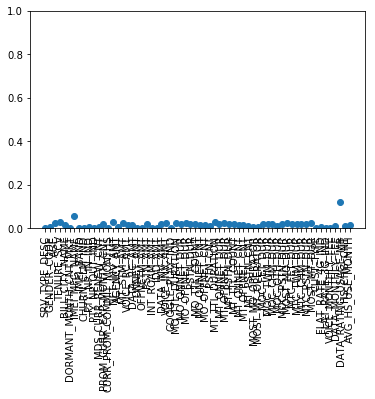

In [108]:
plt.plot(clf.feature_importances_, 'o')  
# for i in 
plt.xticks(range(train_x.shape[1]), train_df.columns[:-1], rotation=90)  
plt.ylim(0, 1)  
plt.show()  

# Check feature importances accurancy

In [197]:
feature_cols = []
limit_importances = 5
for idx, feature in enumerate(important_list):
    if(idx == limit_importances):
        break

    #     print(feature[0])
    feature_cols.append(feature[0])
feature_cols.append("Groups")

In [198]:
feature_cols

['DATA_RATING_USAGE_MB',
 'IMEI_MFG_NAME',
 'NET_INV_AMT',
 'TENURE_SCV',
 'MT_TTL_DURATION',
 'Groups']

In [199]:
feature_train_x = train_df[feature_cols].iloc[:, 0:-1].values
feature_test_x = test_df[feature_cols].iloc[:, 0:-1].values

In [200]:
gs_feature = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_feature_clf = gs_feature.fit(feature_train_x, train_numeric_y)

In [201]:
clf_feature = grid_feature_clf.best_estimator_
clf_feature_info = str(("Accuracy on training set: %f" % clf_feature.score(feature_train_x, train_numeric_y))) + '\n'
clf_feature_info += str(("Accuracy on test set: %f" % clf_feature.score(feature_test_x, test_numeric_y))) + '\n'
clf_feature_info += str(('fit time %s seconds' % format(time() - start_time))) + '\n'
clf_feature_info += str(('feature selection numbers = %s' % str(limit_importances) + '\n'

print(clf_feature_info)

SyntaxError: invalid syntax (<ipython-input-201-0f3f61482efd>, line 7)

In [ ]:
predict_feature_y = clf_feature.predict(feature_test_x)

In [ ]:
cnf_matrix = confusion_matrix(test_numeric_y, predict_feature_y )
cnf_matrix

In [ ]:
group_encoder = []
for idx, row in enumerate(cnf_matrix):
#     success predict
#     print(row[idx])
    current_group = str(le.inverse_transform(idx))
    group_encoder.append(current_group)
#     current_group = groups[idx]

    print(current_group)

    idx_count_in_group = len(test_df[test_df["Groups"] == current_group])
    clf_feature_info +=  "\n\n" + str("class = %s count = [%s / %s]" % (current_group, row[idx], idx_count_in_group))
    clf_feature_info +=  "\n\n" + str("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print("class = %s count = [%s / %s]" % (current_group,row[idx],str(idx_count_in_group)))
    print("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print()

In [ ]:
cnf_pd = pd.DataFrame(cnf_matrix)
cnf_pd.columns = group_encoder
cnf_pd.index = group_encoder

In [ ]:
cnf_pd

In [ ]:
from winsound import Beep
Beep(440, 500) 
Beep(440, 500) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000) 
Beep(659, 500) 
Beep(659, 500) 
Beep(659, 500) 
Beep(698, 350) 
Beep(523, 150) 
Beep(415, 500) 
Beep(349, 350) 
Beep(523, 150) 
Beep(440, 1000)

In [ ]:
mail_info = clf_feature_info.replace("\n", "<br>")

In [ ]:
mail_info

In [ ]:
from mailerWithUtf8 import mail
test=mail()
test.main("clf_info finished", mail_info)